# Scaling
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [6]:
import pandas as pd
import numpy as np

import acquire
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
# get data
df = w.wrangle_telco()

In [4]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.6,9,593.30
1,0003-MKNFE,59.9,9,542.40
2,0004-TLHLJ,73.9,4,280.85
3,0011-IGKFF,98.0,13,1237.85
4,0013-EXCHZ,83.9,3,267.40


In [5]:
train, test, split = w.banana_split(df)

train --> (3943, 4)
validate --> (1691, 4)
test --> (1409, 4)


In [ ]:
# use Min_max scaler

In [8]:
mm_scaler = MinMaxScaler()

In [10]:
mm_scaler.fit(train[['monthly_charges']])

MinMaxScaler()

In [12]:
train['monthly_charges_minmax'] = mm_scaler.transform(train[['monthly_charges']])

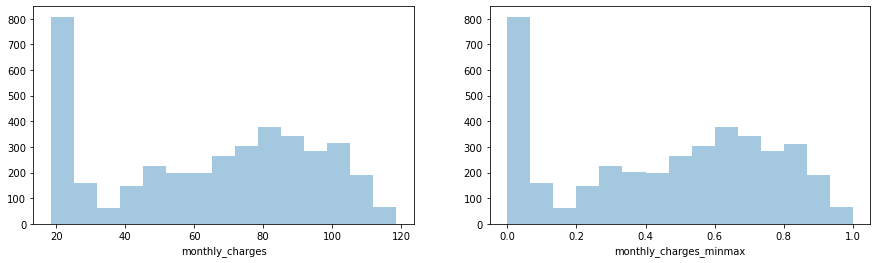

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.distplot(train.monthly_charges, kde = False)

plt.subplot(122)
sns.distplot(train.monthly_charges_minmax, kde = False)

plt.show()

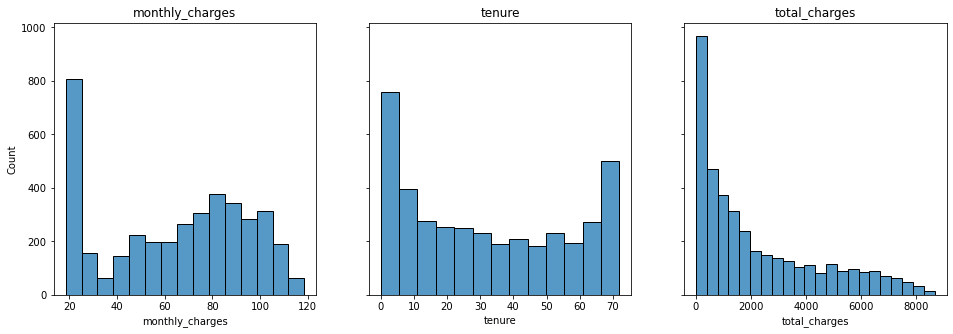

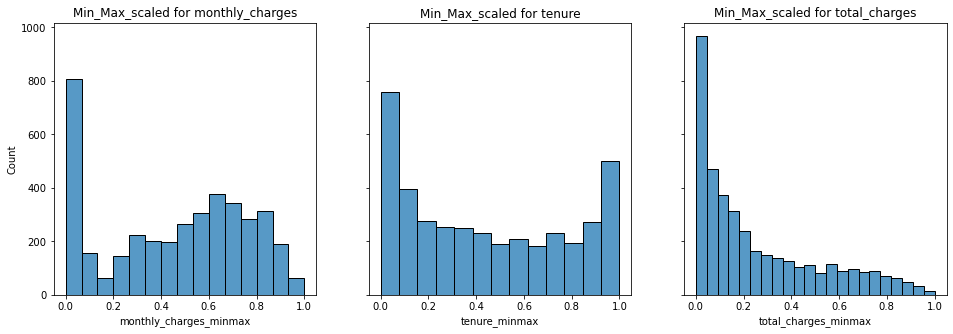

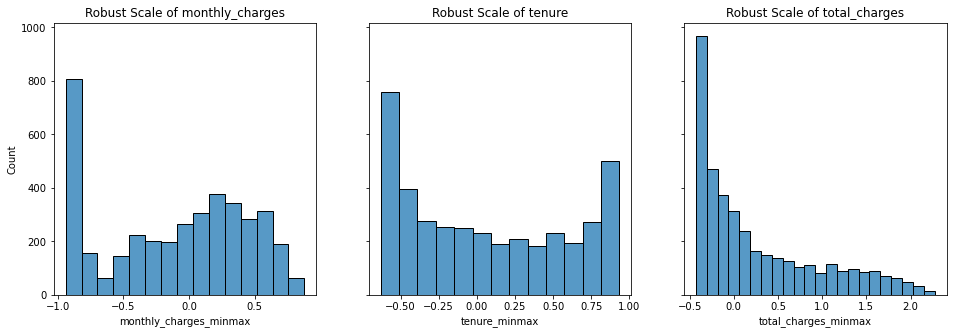

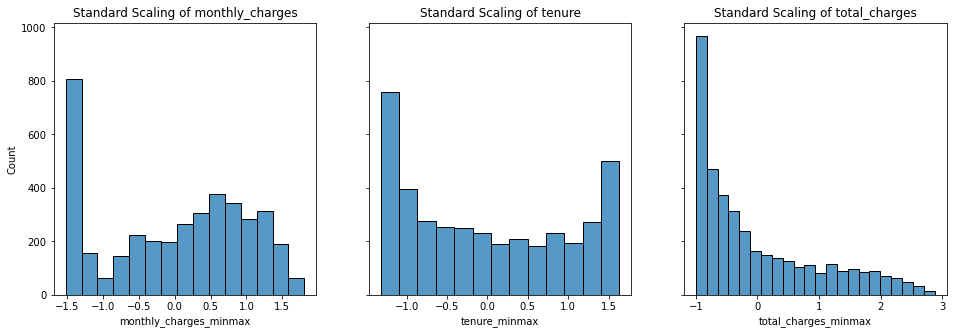

In [61]:

# OK let's loop this mamma jamma

# create lists
col_names = ['monthly_charges', 'tenure', 'total_charges']


# plot regular scales

fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    sns.histplot(x = train[col], kde = False, ax = ax)
    ax.set(title = col)
    

# use MinMax scales
    
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    mm_scaler = MinMaxScaler()

    mm_scaler.fit(train[{col}])

    train[f'{col}_minmax'] = mm_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_minmax'], kde = False, ax = ax)
    
    ax.set(title = f'Min_Max_scaled for {col}')
        

# use RobustScaler
        
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    robust_scaler = RobustScaler()

    robust_scaler.fit(train[{col}])

    train[f'{col}_minmax'] = robust_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_minmax'], kde = False, ax = ax)
    
    ax.set(title = f'Robust Scale of {col}')

    
# use StandardScaler
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    standard_scaler = StandardScaler()

    standard_scaler.fit(train[{col}])

    train[f'{col}_minmax'] = standard_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_minmax'], kde = False, ax = ax)
    
    ax.set(title = f'Standard Scaling of {col}')

In [60]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,tenure_minmax,total_charges_minmax
2118,3043-TYBNO,60.65,3,196.90,-0.120254,-1.197107,-0.911654
6206,8778-LMWTJ,74.85,9,708.20,0.351949,-0.950946,-0.683290
877,1269-FOYWN,20.00,44,860.85,-1.472019,0.484999,-0.615112
2407,3446-QDSZF,55.50,4,227.35,-0.291511,-1.156080,-0.898054
2780,3956-MGXOG,80.60,28,2244.95,0.543157,-0.171433,0.003074
